# Using Pandas and Statsmodels for Regression with Fiscal Data 

In [13]:
# Import required packages

import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
np.random.seed(42)

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Read required datasets

In [4]:
df = pd.read_csv('ttb_county_clean.csv')
df1 = pd.read_csv('df_panel_fix.csv')

## Figure 1

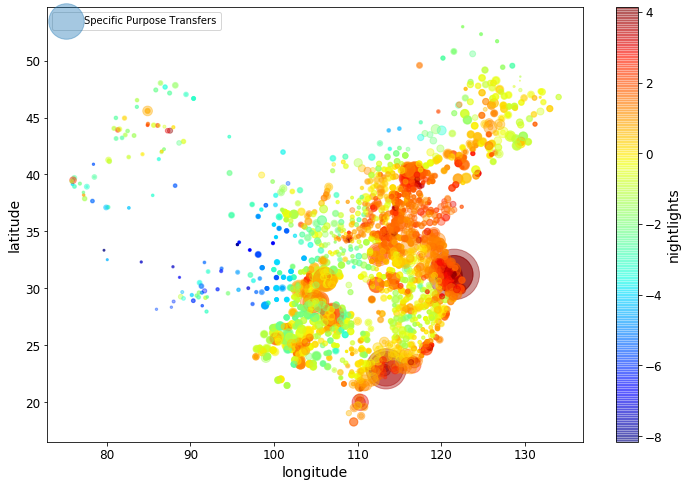

In [5]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["specific"]/100, label="Specific Purpose Transfers", figsize=(12,8),
    c="nightlights", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
#save_fig("cn-spt-county-heat")
plt.legend()



## Panel regression framework with year and province fixed effects


In [6]:
lin_reg = smf.ols('np.log(specific) ~ np.log(gdp) + np.log(fdi) + i + rnr + rr + C(province) + C(year)', data=df1).fit()

In [10]:
#lin_reg.summary()

## Figure 2

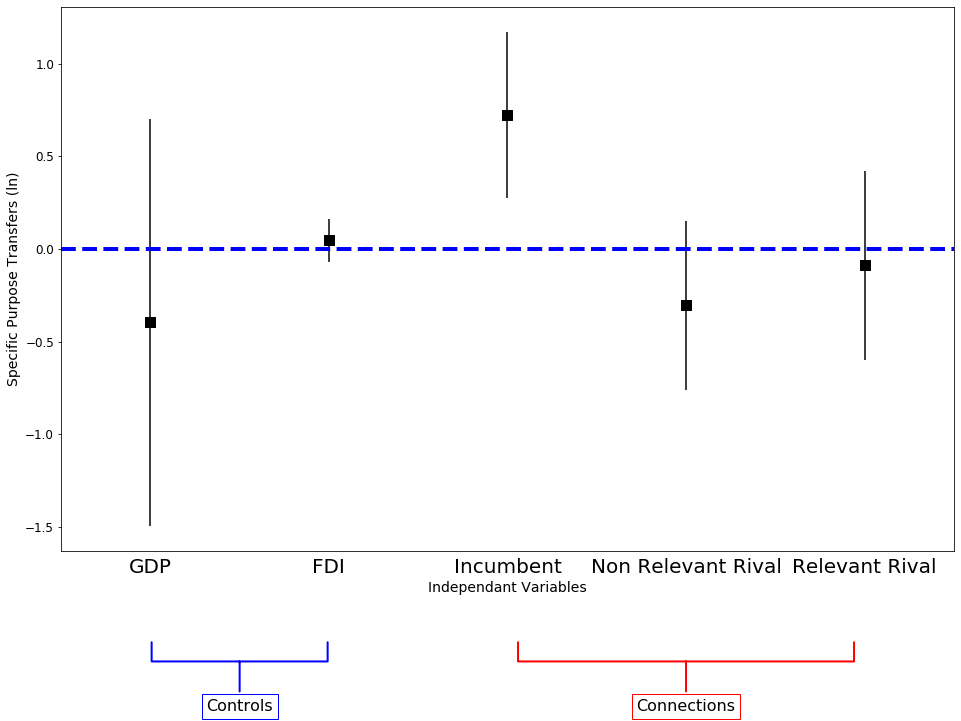

In [7]:
coef_df = pd.read_csv('coef.csv')

fig, ax = plt.subplots(figsize=(16, 10))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Specific Purpose Transfers (ln)')
ax.set_xlabel('Independant Variables')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='blue', linewidth=4)
ax.xaxis.set_ticks_position('none')

_ = ax.set_xticklabels(['GDP', 'FDI', 'Incumbent', 'Non Relevant Rival', 'Relevant Rival'], 
                       rotation=0, fontsize=20)

fs = 16
ax.annotate('Controls', xy=(0.2, -0.2), xytext=(0.2, -0.3), 
            xycoords='axes fraction', 
            textcoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', ec='blue'),
            arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=1.2', lw=2.0, color='blue'))

_ = ax.annotate('Connections', xy=(0.7, -0.2), xytext=(0.7, -0.3), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=fs, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='red'),
                 arrowprops=dict(arrowstyle='-[, widthB=10.5, lengthB=1.2', lw=2.0, color='red'))

#save_fig("i-coef-plot")



## Figure 3

In [8]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0


#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go



trace1 = go.Bar(
    x=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007],
    y=[188870900000.0, 185182900000.0, 237697500000.0, 347187900000.0, 296716700000.0,
       397833100000.0, 440204800000.0, 514254300000.0, 686016600000.0, 677746300000.0, 940057900000.0,
       1881304000000],
    name='All Other Province Leaders',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007],
    y=[260376000000.0, 264934700000.0, 367350200000.0, 463861200000.0, 199068500000.0, 216582600000.0,
  298631800000.0, 409759300000.0, 830363200000.0, 878158000000.0, 1143745000000.0, 2125891000000.0],
    name='Incumbent Connected Province Leaders',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Specific Purpose Transfers',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='RMB',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)

#iplot(fig, filename='style-bar')
iplot(fig, image='png',filename='spt-i-bar')

4.1.1
